In [25]:
import numpy as np

import matplotlib.pyplot as plt

import lightgbm as lgb

import shap

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score

In [26]:
# Generate sample dataset

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)


In [27]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Train Lightgbm model

lgb_clf = lgb.LGBMClassifier(n_estimators=100)

In [29]:
lgb_clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier()

In [30]:
# Get feature importance

feature_importances = lgb_clf.feature_importances_

features = [f"feature {i}" for i in range(X.shape[1])]

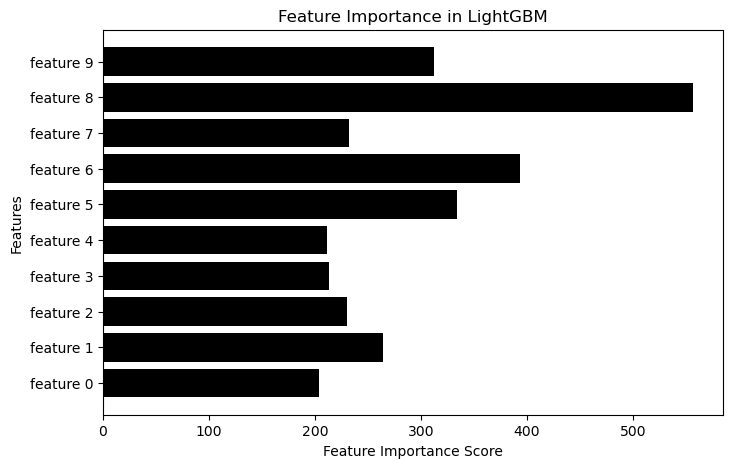

In [31]:
# Plot feature importance

plt.figure(figsize=(8,5))

plt.barh(features, feature_importances,color='black')

plt.xlabel("Feature Importance Score")

plt.ylabel("Features")

plt.title('Feature Importance in LightGBM')

plt.show()

SHAP values (from SHapley Additive Explanations) show feature importance per prediction.

In [32]:
explainer = shap.Explainer(lgb_clf)

shap_values = explainer(X_train)

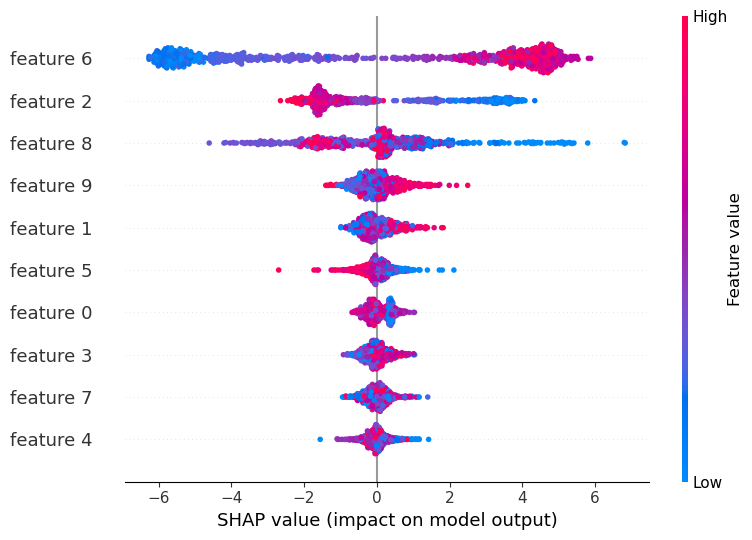

In [33]:
# SHAP summary plot

shap.summary_plot(shap_values,X_train, feature_names = features)

Recursive Feature Elimination (RFE) for Feature Selection

In [34]:
# Use RFE for feature selection

selector = RFE(lgb_clf, n_features_to_select=5)

selector.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

RFE(estimator=LGBMClassifier(), n_features_to_select=5)

In [35]:
# Get selected features

selected_features = np.array(features)[selector.support_]

print("Selected Features:", selected_features)

Selected Features: ['feature 1' 'feature 5' 'feature 6' 'feature 8' 'feature 9']


In [36]:
# Train model with selected features

X_train_selected = selector.transform(X_train)

X_test_selected = selector.transform(X_test)

lgb_clf.fit(X_train_selected,y_train)

[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [37]:
# Evaluate

y_pred = lgb_clf.predict(X_test_selected)

print("Accuracy with selected features:", accuracy_score(y_test, y_pred))

Accuracy with selected features: 0.89
